In [5]:
# Importing all necessary required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

print("TCS iON RIO | Retail Sales Forecasting System")
print("=" * 60)

# Setting random seed for reproducibility
np.random.seed(42)
random.seed(42)

TCS iON RIO | Retail Sales Forecasting System


In [23]:
print("PHASE 1: DATA GENERATION - 200,000 Records")
print("-" * 30)

# Creating realistic product names
product_categories = [
    "Electronics", "Clothing", "Home_Garden", "Grocery", "Beauty_Personal_Care", 
    "Sports_Outdoors", "Books_Media", "Toys_Games", "Automotive", "Health_Wellness",
    "Office_Supplies", "Pet_Supplies", "Baby_Kids", "Jewelry_Accessories", "Tools_Hardware"
]

# Creating product subcategories
product_subcategories = {
    "Electronics": ["Smartphone", "Laptop", "Headphones", "Tablet", "Smartwatch", "Camera", "TV", "Gaming_Console", "Speaker", "Router"],
    "Clothing": ["Mens_Shirt", "Womens_Dress", "Jeans", "Jacket", "Shoes", "Sneakers", "Formal_Wear", "Casual_Wear", "Winter_Coat", "Summer_Top"],
    "Home_Garden": ["Furniture", "Kitchen_Appliance", "Bedding", "Home_Decor", "Garden_Tool", "Lighting", "Storage", "Bathroom", "Dining", "Living_Room"],
    "Grocery": ["Packaged_Food", "Beverages", "Dairy_Products", "Fresh_Produce", "Frozen_Food", "Snacks", "Bakery", "Meat", "Seafood", "Organic_Food"],
    "Beauty_Personal_Care": ["Skincare", "Makeup", "Haircare", "Fragrance", "Body_Care", "Oral_Care", "Shaving", "Nail_Care", "Sun_Care", "Anti_Aging"],
    "Sports_Outdoors": ["Fitness_Equipment", "Sports_Apparel", "Athletic_Shoes", "Outdoor_Gear", "Camping", "Cycling", "Running", "Team_Sports", "Water_Sports", "Winter_Sports"],
    "Books_Media": ["Fiction_Books", "Non_Fiction", "Educational", "Children_Books", "Comics", "Magazines", "Music_CD", "Movies_DVD", "E_Books", "Audiobooks"],
    "Toys_Games": ["Action_Figures", "Dolls", "Board_Games", "Puzzles", "Educational_Toys", "Electronic_Toys", "Outdoor_Toys", "Building_Sets", "Art_Crafts", "Video_Games"],
    "Automotive": ["Car_Parts", "Motor_Oil", "Tires", "Car_Accessories", "Tools", "Car_Care", "Electronics", "Interior", "Exterior", "Performance"],
    "Health_Wellness": ["Vitamins", "Supplements", "Medical_Equipment", "First_Aid", "Fitness_Nutrition", "Weight_Management", "Heart_Health", "Joint_Care", "Immune_Support", "Mental_Wellness"],
    "Office_Supplies": ["Stationery", "Printer_Paper", "Office_Electronics", "Furniture", "Organization", "Writing_Instruments", "Filing", "Presentation", "Computer_Accessories", "Office_Decor"],
    "Pet_Supplies": ["Dog_Food", "Cat_Food", "Pet_Toys", "Pet_Care", "Aquarium", "Bird_Supplies", "Small_Animal", "Pet_Health", "Grooming", "Pet_Accessories"],
    "Baby_Kids": ["Baby_Food", "Diapers", "Baby_Care", "Kids_Clothing", "Toys", "Baby_Gear", "Feeding", "Safety", "Nursery", "Educational"],
    "Jewelry_Accessories": ["Necklaces", "Earrings", "Rings", "Bracelets", "Watches", "Sunglasses", "Bags", "Wallets", "Belts", "Fashion_Accessories"],
    "Tools_Hardware": ["Hand_Tools", "Power_Tools", "Hardware", "Fasteners", "Safety_Equipment", "Measuring", "Storage", "Electrical", "Plumbing", "Paint_Supplies"]
}

# Creating Brand Names for Product Diversity
brands = ["Alpha", "Beta", "Prime", "Elite", "Pro", "Max", "Ultra", "Super", "Deluxe", "Premium", "Standard", "Classic", "Modern", "Advanced", "Smart"]


# Generating product Catalog
print("Generating Product Catalog...")
product_names = []
for category in product_categories:
    for subcategory in product_subcategories[category]:
        for brand in brands[:8]:  # Using 8 brands per subcategory
            for model_num in range(1, 6):  # 5 models variations per brand
                product_name = f"{category}_{subcategory}_{brand}_Model{model_num}"
                product_names.append(product_name)

print(f"Generated {len(product_names):,} unique products")


#Defining Cost Range using Random
def get_product_cost(product_name):
    category = product_name.split('_')[0]
    cost_ranges = {
        "Electronics": (5000, 180000),
        "Automotive": (2000, 65000),
        "Home_Garden": (1500, 95000),
        "Jewelry_Accessories": (1200, 40000),
        "Tools_Hardware": (800, 32000),
        "Sports_Outdoors": (2000, 48000),
        "Office_Supplies": (400, 16000),
        "Clothing": (1200, 24000),
        "Health_Wellness": (650, 12000),
        "Beauty_Personal_Care": (400, 8000),
        "Books_Media": (250, 6500),
        "Toys_Games": (650, 16000),
        "Pet_Supplies": (400, 9500),
        "Baby_Kids": (800, 20000),
        "Grocery": (150, 4000)
    }
    min_cost, max_cost = cost_ranges.get(category, (800, 8000))
    return round(np.random.uniform(min_cost, max_cost), 2)


# Generating 4 years of data (2020-2023)
years = [2020, 2021, 2022, 2023]
months = list(range(1, 13))

print("Generating Sales Data...")
print(f"Time Period: {min(years)} - {max(years)} ({len(years)} years)")
print(f"Months per year: {len(months)}")

PHASE 1: DATA GENERATION - 200,000 Records
------------------------------
Generating Product Catalog...
Generated 6,000 unique products
Generating Sales Data...
Time Period: 2020 - 2023 (4 years)
Months per year: 12


In [24]:
# Calculating total possible combinations
total_combinations = len(product_names) * len(years) * len(months)
print(f"Total possible combinations: {total_combinations:,}")

Total possible combinations: 288,000


In [25]:
# Since we need exactly 200,000 records, we'll sample strategically
target_records = 200000
sampling_rate = target_records / total_combinations

print(f"Target records: {target_records:,}")
print(f"Sampling rate: {sampling_rate:.4f}")

Target records: 200,000
Sampling rate: 0.6944


In [35]:
# Generating Dataset

records = []
record_count = 0

# Pre-calculate costs for each product
product_costs = {product: get_product_cost(product) for product in product_names}

print("Generating retail sales records...")


# Generate 4 years of data (2020-2023) as specified in project requirements
years = [2020, 2021, 2022, 2023]
months = list(range(1, 13))  # 12 months per year

print("Generating Sales Data...")
print(f"Time Period: {min(years)} - {max(years)} ({len(years)} years)")
print(f"Months per year: {len(months)}")

# Calculate total possible combinations
total_combinations = len(product_names) * len(years) * len(months)
print(f"Total possible combinations: {total_combinations:,}")

# Since we need exactly 200,000 records, we'll sample strategically
target_records = 200000
sampling_rate = target_records / total_combinations

print(f"Target records: {target_records:,}")
print(f"Sampling rate: {sampling_rate:.4f}")

# Generate the dataset
records = []
record_count = 0

# Pre-calculate costs for each product (consistent across time)
product_costs = {product: get_product_cost(product) for product in product_names}

print("Generating retail sales records...")

for year in years:
    year_progress = (year - min(years) + 1) / len(years)
    
    for month in months:
        month_progress = f"Year {year}, Month {month:02d}"
        
        # Determining how many products to sample for this month
        if sampling_rate >= 1.0:
            # Using all products if we need more records than combinations
            selected_products = product_names
        else:
            # Sampling products for this time period
            n_products = max(1, int(len(product_names) * sampling_rate))
            if record_count < target_records - 1000:  # Leaving room for final records
                n_products = min(n_products + random.randint(0, 50), len(product_names))
            selected_products = random.sample(product_names, min(n_products, len(product_names)))
        
        for product in selected_products:
            if record_count >= target_records:
                break
                
            # Generating realistic monthly sales with business patterns
            base_sales = np.random.uniform(50, 1000)
            
            # Adding yearly growth trend (5-12% per year)
            growth_rate = np.random.uniform(0.05, 0.12)
            year_factor = 1 + (year - 2020) * growth_rate
            
            # Adding seasonal patterns
            seasonal_factors = {
              1: 0.85,   # January – Post-New Year dip, inventory clearance
              2: 0.9,    # February – Low engagement, pre-festive 
              3: 1.1,    # March – Fiscal year-end, budget push
              4: 1.0,    # April – Start of new financial year, moderate activity
              5: 1.2,    # May – Summer sales, ACs, coolers, travel gear
              6: 1.3,    # June – Pre-monsoon, wedding season spikes
              7: 1.1,    # July – Monsoon slowdown, essentials dominate
              8: 1.4,    # August – Raksha Bandhan, Independence Day promos
              9: 1.6,    # September – Ganesh Chaturthi, Onam, pre-Dussehra build-up
             10: 2.0,   # October – Dussehra + Diwali peak
             11: 1.7,   # November – Diwali tail, wedding season, pre-winter
             12: 1.5    # December – Christmas, New Year, winter essentials
            }
            
            season_factor = seasonal_factors.get(month, 1.0)
            
            # Adding category-specific patterns
            category = product.split('_')[0]
            category_factors = {
                "Electronics": np.random.uniform(0.9, 1.4),
                "Clothing": np.random.uniform(0.8, 1.3),
                "Grocery": np.random.uniform(1.0, 1.1),  
                "Toys_Games": 1.5 if month == 12 else np.random.uniform(0.7, 1.2),
                "Sports_Outdoors": 1.3 if month in [5,6,7,8] else np.random.uniform(0.8, 1.1),
            }
            category_factor = category_factors.get(category, np.random.uniform(0.9, 1.2))
            
            # Adding random variation
            random_factor = np.random.uniform(0.85, 1.15)
            
            # Calculating final monthly sales
            monthly_sales = int(base_sales * year_factor * season_factor * category_factor * random_factor)
            monthly_sales = max(1, monthly_sales)  # Ensure at least 1 sale
            
            # Getting product cost with slight yearly inflation
            inflation_factor = 1 + (year - 2020) * 0.025  # 2.5% annual inflation
            cost = round(product_costs[product] * inflation_factor * np.random.uniform(0.98, 1.02), 2)
            
            # Creating record
            records.append({
                'Product_Name': product,
                'Cost': cost,
                'Year': year,
                'Month': month, 
                'Monthly_Sales': monthly_sales
            })
            
            record_count += 1
            
            # Progress indicator
            if record_count % 10000 == 0:
                progress = (record_count / target_records) * 100
                print(f"Progress: {record_count:,} / {target_records:,} ({progress:.1f}%)")
        
        if record_count >= target_records:
            break
    
    if record_count >= target_records:
        break

# Adjusting to exactly 200,000 records if needed
if len(records) > target_records:
    records = records[:target_records]
elif len(records) < target_records:
    # Generating additional records to reach exactly 200,000
    remaining = target_records - len(records)
    print(f"Generating {remaining:,} additional records...")
    
    for i in range(remaining):
        # Randomly select parameters for additional records
        product = random.choice(product_names)
        year = random.choice(years)
        month = random.choice(months)
        
        # Generating sales and cost
        base_sales = np.random.uniform(50, 800)
        monthly_sales = int(base_sales * np.random.uniform(0.8, 1.5))
        cost = round(product_costs[product] * (1 + (year - 2020) * 0.025) * np.random.uniform(0.98, 1.02), 2)
        
        records.append({
            'Product_Name': product,
            'Cost': cost,
            'Year': year,
            'Month': month,
            'Monthly_Sales': monthly_sales
        })


Generating retail sales records...
Generating Sales Data...
Time Period: 2020 - 2023 (4 years)
Months per year: 12
Total possible combinations: 288,000
Target records: 200,000
Sampling rate: 0.6944
Generating retail sales records...
Progress: 10,000 / 200,000 (5.0%)
Progress: 20,000 / 200,000 (10.0%)
Progress: 30,000 / 200,000 (15.0%)
Progress: 40,000 / 200,000 (20.0%)
Progress: 50,000 / 200,000 (25.0%)
Progress: 60,000 / 200,000 (30.0%)
Progress: 70,000 / 200,000 (35.0%)
Progress: 80,000 / 200,000 (40.0%)
Progress: 90,000 / 200,000 (45.0%)
Progress: 100,000 / 200,000 (50.0%)
Progress: 110,000 / 200,000 (55.0%)
Progress: 120,000 / 200,000 (60.0%)
Progress: 130,000 / 200,000 (65.0%)
Progress: 140,000 / 200,000 (70.0%)
Progress: 150,000 / 200,000 (75.0%)
Progress: 160,000 / 200,000 (80.0%)
Progress: 170,000 / 200,000 (85.0%)
Progress: 180,000 / 200,000 (90.0%)
Progress: 190,000 / 200,000 (95.0%)
Progress: 200,000 / 200,000 (100.0%)


In [36]:
#creating dataframe
print("Creating DataFrame")
df = pd.DataFrame(records)

Creating DataFrame


In [45]:
print("\n" + "="*60)
print("DATASET GENERATION COMPLETE")
print("="*60)
print(f"Total Records Generated: {len(df):,}")
print(f"Time Period Coverage: {df['Year'].min()} - {df['Year'].max()}")
print(f"Unique Products: {df['Product_Name'].nunique():,}")
print(f"Dataset Columns: {list(df.columns)}")


DATASET GENERATION COMPLETE
Total Records Generated: 200,000
Time Period Coverage: 2020 - 2023
Unique Products: 6,000
Dataset Columns: ['Product_Name', 'Cost', 'Year', 'Month', 'Monthly_Sales']


In [39]:
# Data quality summary
print(f"\nDATA QUALITY SUMMARY:")
print(f"Cost Range: ₹{df['Cost'].min():.2f} - ₹{df['Cost'].max():.2f}")
print(f"Sales Range: {df['Monthly_Sales'].min():,} - {df['Monthly_Sales'].max():,} units")
print(f"Missing Values: {df.isnull().sum().sum()}")


DATA QUALITY SUMMARY:
Cost Range: ₹152.52 - ₹194497.74
Sales Range: 38 - 3,596 units
Missing Values: 0


In [40]:
# Year-wise distribution
print(f"\nYEAR-WISE DISTRIBUTION:")
year_distribution = df['Year'].value_counts().sort_index()
for year, count in year_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"   {year}: {count:,} records ({percentage:.1f}%)")


YEAR-WISE DISTRIBUTION:
   2020: 50,353 records (25.2%)
   2021: 50,316 records (25.2%)
   2022: 50,293 records (25.1%)
   2023: 49,038 records (24.5%)


In [41]:
# Month-wise distribution
print(f"\n MONTH-WISE DISTRIBUTION:")
month_distribution = df['Month'].value_counts().sort_index()
for month, count in month_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"   Month-{month:02d}: {count:,} records ({percentage:.1f}%)")


📅 MONTH-WISE DISTRIBUTION:
   Month-01: 16,805 records (8.4%)
   Month-02: 16,737 records (8.4%)
   Month-03: 16,767 records (8.4%)
   Month-04: 16,773 records (8.4%)
   Month-05: 16,796 records (8.4%)
   Month-06: 16,823 records (8.4%)
   Month-07: 16,753 records (8.4%)
   Month-08: 16,778 records (8.4%)
   Month-09: 16,742 records (8.4%)
   Month-10: 16,771 records (8.4%)
   Month-11: 16,744 records (8.4%)
   Month-12: 15,511 records (7.8%)


In [42]:
# Saving the dataset
output_filename = "retail_sales_data.csv"
df.to_csv(output_filename, index=False)
print(f"\nDataset saved as '{output_filename}'")


Dataset saved as 'retail_sales_data.csv'


In [44]:
# Displaying sample data
print(f"\nSAMPLE DATA (First 10 records):")
print("-" * 70)
sample_df = df.head(10)
for idx, row in sample_df.iterrows():
    print(f"{idx+1:2d}. {row['Product_Name'][:30]:<30} | ₹{row['Cost']:>7.2f} | {row['Year']} | Month {row['Month']:>2} | {row['Monthly_Sales']:>6,} units")
print(f"\nSUCCESS: Retail Sales Forecasting dataset with exactly {len(df):,} records generated!")
print("="*70)


SAMPLE DATA (First 10 records):
----------------------------------------------------------------------
 1. Toys_Games_Puzzles_Max_Model1  | ₹6972.56 | 2020 | Month  1 |  1,028 units
 2. Beauty_Personal_Care_Shaving_P | ₹5823.05 | 2020 | Month  1 |    745 units
 3. Pet_Supplies_Bird_Supplies_Pro | ₹5054.66 | 2020 | Month  1 |    283 units
 4. Health_Wellness_Joint_Care_Pro | ₹5996.00 | 2020 | Month  1 |    391 units
 5. Sports_Outdoors_Team_Sports_Ul | ₹3064.41 | 2020 | Month  1 |    582 units
 6. Tools_Hardware_Electrical_Beta | ₹5887.23 | 2020 | Month  1 |    289 units
 7. Grocery_Beverages_Beta_Model2  | ₹2917.79 | 2020 | Month  1 |    345 units
 8. Sports_Outdoors_Outdoor_Gear_S | ₹7180.84 | 2020 | Month  1 |    357 units
 9. Jewelry_Accessories_Fashion_Ac | ₹4801.60 | 2020 | Month  1 |    451 units
10. Jewelry_Accessories_Bracelets_ | ₹6660.91 | 2020 | Month  1 |    808 units

SUCCESS: Retail Sales Forecasting dataset with exactly 200,000 records generated!


In [46]:
# Phase 2: Data Cleaning and Sanitization

print("\nPHASE 2: DATA CLEANING AND SANITIZATION")
print("-" * 40)

# Loading the dataset
df = pd.read_csv("retail_sales_data.csv")


PHASE 2: DATA CLEANING AND SANITIZATION
----------------------------------------


In [47]:
# Checking initial info
print("Initial dataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

Initial dataset info:
Shape: (200000, 5)
Columns: ['Product_Name', 'Cost', 'Year', 'Month', 'Monthly_Sales']
Data types:
Product_Name      object
Cost             float64
Year               int64
Month              int64
Monthly_Sales      int64
dtype: object


In [48]:
# Checking for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")


Missing values:
Product_Name     0
Cost             0
Year             0
Month            0
Monthly_Sales    0
dtype: int64


In [49]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [50]:
# So from above we found that there is no missing or duplicate value in our generated dataset

In [52]:
# Checking data ranges and validity
print(f"\nYear range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Month range: {df['Month'].min()} to {df['Month'].max()}")
print(f"Cost range: ₹{df['Cost'].min():.2f} to ₹{df['Cost'].max():.2f}")
print(f"Monthly sales range: {df['Monthly_Sales'].min()} to {df['Monthly_Sales'].max()} units")



Year range: 2020 to 2023
Month range: 1 to 12
Cost range: ₹152.52 to ₹194497.74
Monthly sales range: 38 to 3596 units


In [53]:
# Checking for negative values
negative_cost = (df['Cost'] <= 0).sum()
negative_sales = (df['Monthly_Sales'] <= 0).sum()
print(f"Rows with non-positive cost: {negative_cost}")
print(f"Rows with non-positive sales: {negative_sales}")

# Handling any anomalies if any
if negative_cost > 0 or negative_sales > 0:
    print("Handling anomalies...")
    # Replacing non-positive costs with product average
    product_avg_cost = df.groupby('Product_Name')['Cost'].transform('mean')
    df.loc[df['Cost'] <= 0, 'Cost'] = product_avg_cost
    
    # Replacing non-positive sales with product average
    product_avg_sales = df.groupby('Product_Name')['Monthly_Sales'].transform('mean')
    df.loc[df['Monthly_Sales'] <= 0, 'Monthly_Sales'] = product_avg_sales

Rows with non-positive cost: 0
Rows with non-positive sales: 0


In [56]:
# Since no negative negative values are found, we continue to verify other data

print(f"\nCleaning Summary:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Non-positive cost: {(df['Cost'] <= 0).sum()}")
print(f"Non-positive sales: {(df['Monthly_Sales'] <= 0).sum()}")


Cleaning Summary:
Missing values: 0
Duplicate rows: 0
Non-positive cost: 0
Non-positive sales: 0


In [57]:
# Saving cleaned dataset
df.to_csv("cleaned_retail_sales.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_retail_sales.csv'")

# Showing cleaned data summary
print("\nCleaned data summary:")
print(df.describe())


Cleaned dataset saved as 'cleaned_retail_sales.csv'

Cleaned data summary:
                Cost           Year          Month  Monthly_Sales
count  200000.000000  200000.000000  200000.000000  200000.000000
mean    13247.011829    2021.490080       6.463945     815.594585
std     28257.215242       1.115266       3.434782     509.194965
min       152.520000    2020.000000       1.000000      38.000000
25%      2825.975000    2020.000000       3.000000     409.000000
50%      5070.690000    2021.000000       6.000000     747.000000
75%      7526.942500    2022.000000       9.000000    1128.000000
max    194497.740000    2023.000000      12.000000    3596.000000


In [58]:
# Phase 3: EDA
print("\nPHASE 3: EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Loading the Cleaned dataset
df = pd.read_csv("cleaned_retail_sales.csv")

# Setting visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


PHASE 3: EXPLORATORY DATA ANALYSIS
----------------------------------------


In [60]:
# 1. Overall dataset overview
print("1. DATASET OVERVIEW")
print(f"Total records: {len(df):,}")
print(f"Time period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Unique products: {df['Product_Name'].nunique()}")
print(f"Data completeness: {100 - df.isnull().sum().sum()/len(df)*100:.2f}%")

1. DATASET OVERVIEW
Total records: 200,000
Time period: 2020 - 2023
Unique products: 6000
Data completeness: 100.00%


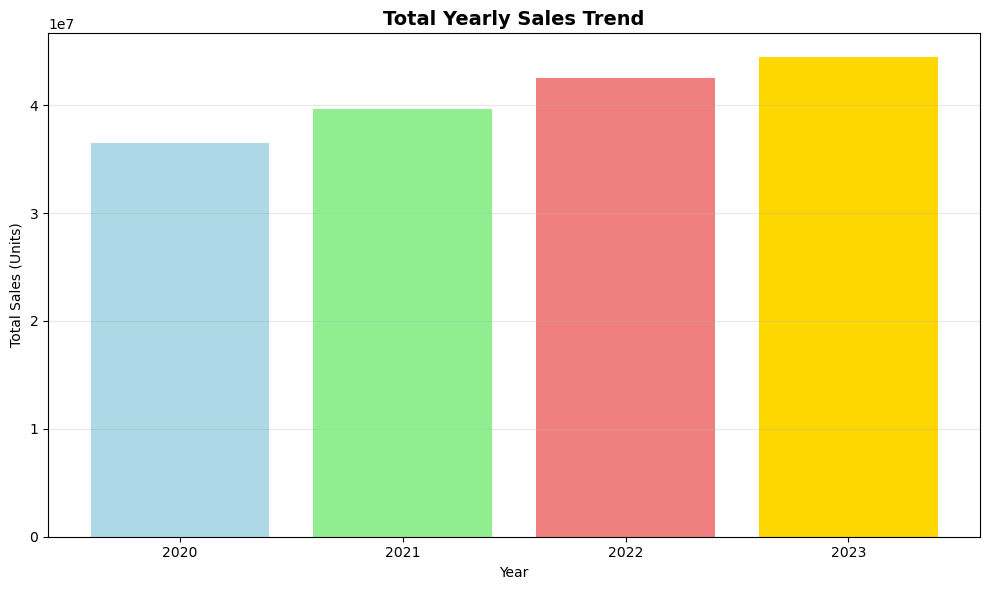

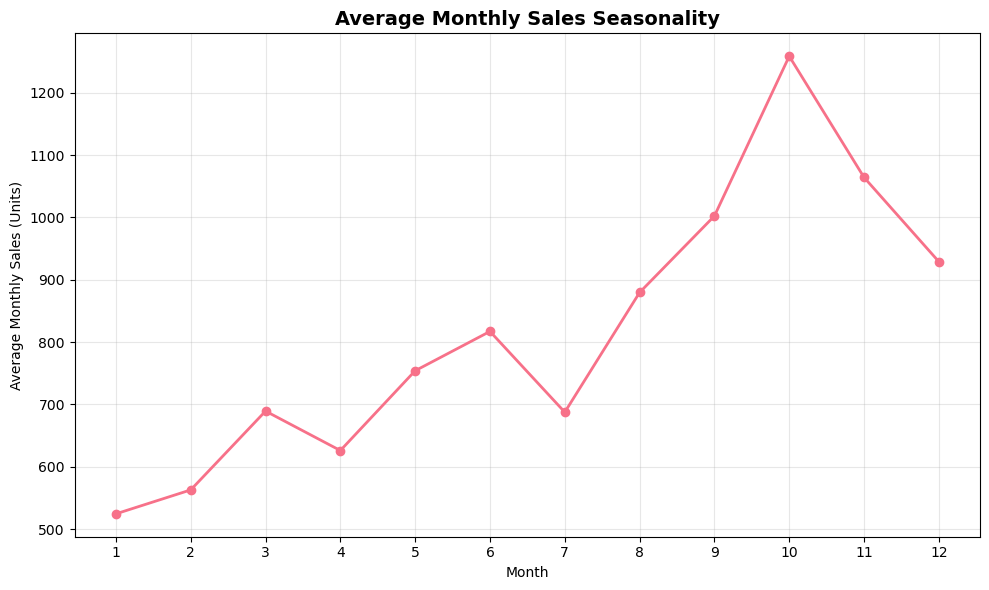

In [61]:
# 2. Temporal Analysis

# Yearly sales trend
yearly_sales = df.groupby('Year')['Monthly_Sales'].agg(['sum', 'mean', 'std']).reset_index()
yearly_sales.columns = ['Year', 'Total_Sales', 'Avg_Monthly_Sales', 'Sales_Std']

plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'].astype(str), yearly_sales['Total_Sales'], 
        color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Total Yearly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Sales (Units)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('yearly_sales_trend.png', dpi=300)
plt.show()

# Monthly seasonality
monthly_avg = df.groupby('Month')['Monthly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'], monthly_avg['Monthly_Sales'], marker='o', linewidth=2)
plt.title('Average Monthly Sales Seasonality', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Monthly Sales (Units)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_seasonality.png', dpi=300)
plt.show()


3. PRODUCT PERFORMANCE ANALYSIS


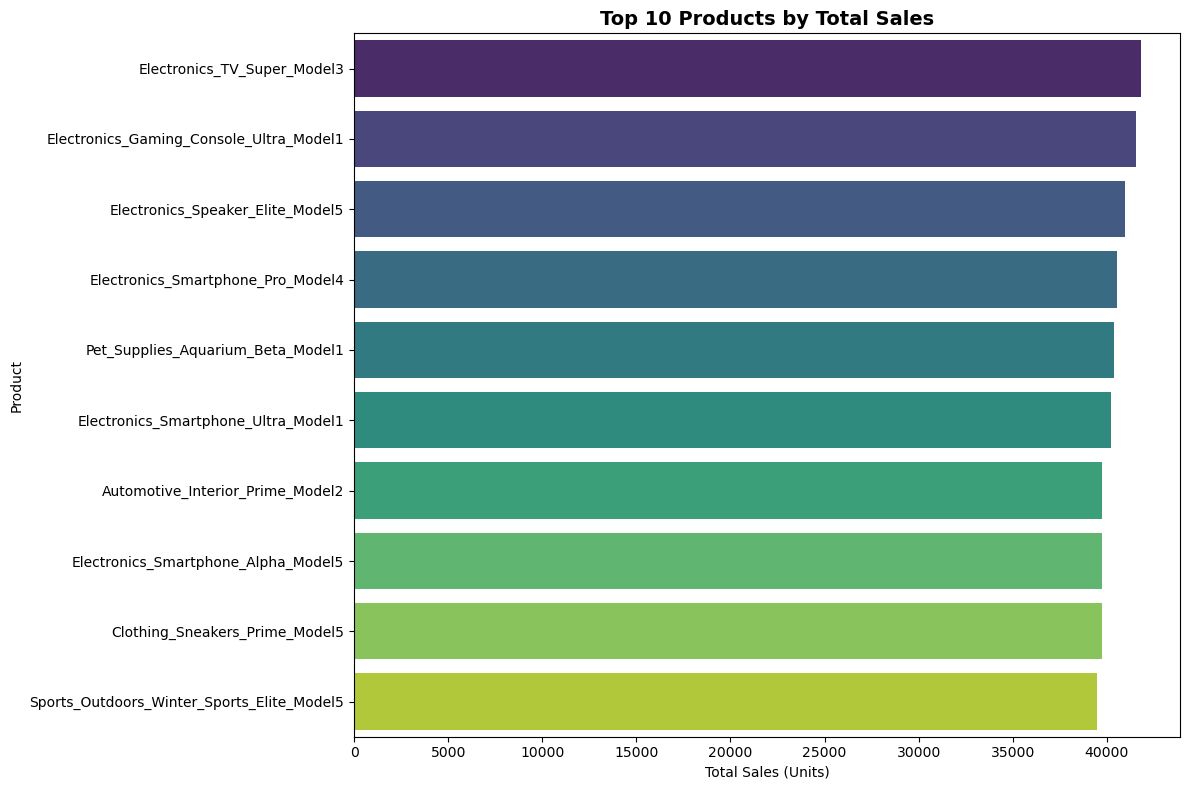

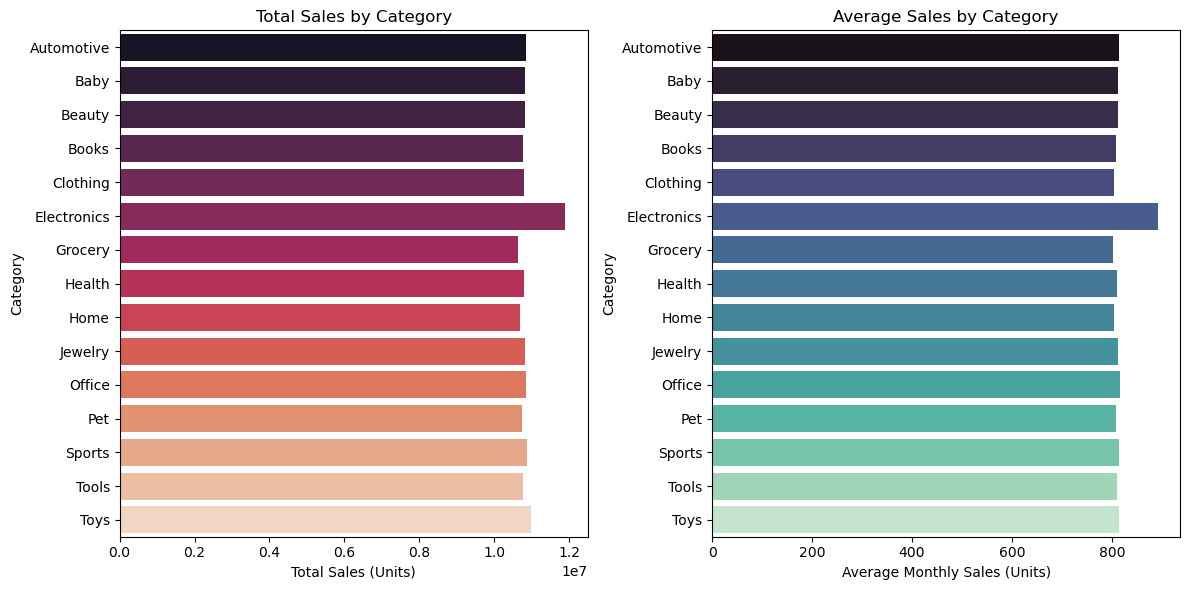

In [62]:
# 3. Product Performance Analysis
print("\n3. PRODUCT PERFORMANCE ANALYSIS")

# Top 10 products by total sales
top_products = df.groupby('Product_Name')['Monthly_Sales'].sum().nlargest(10).reset_index()
top_products.columns = ['Product', 'Total_Sales']

plt.figure(figsize=(12, 8))
sns.barplot(data=top_products, x='Total_Sales', y='Product', palette='viridis')
plt.title('Top 10 Products by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales (Units)')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('top_products.png', dpi=300)
plt.show()

# Product category analysis
df['Product_Category'] = df['Product_Name'].apply(lambda x: x.split('_')[0])
category_sales = df.groupby('Product_Category')['Monthly_Sales'].agg(['sum', 'mean', 'count']).reset_index()
category_sales.columns = ['Category', 'Total_Sales', 'Avg_Sales', 'Count']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=category_sales, x='Total_Sales', y='Category', palette='rocket')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales (Units)')

plt.subplot(1, 2, 2)
sns.barplot(data=category_sales, x='Avg_Sales', y='Category', palette='mako')
plt.title('Average Sales by Category')
plt.xlabel('Average Monthly Sales (Units)')

plt.tight_layout()
plt.savefig('category_analysis.png', dpi=300)
plt.show()


4. COST VS SALES RELATIONSHIP
Correlation between Cost and Sales: 0.0341


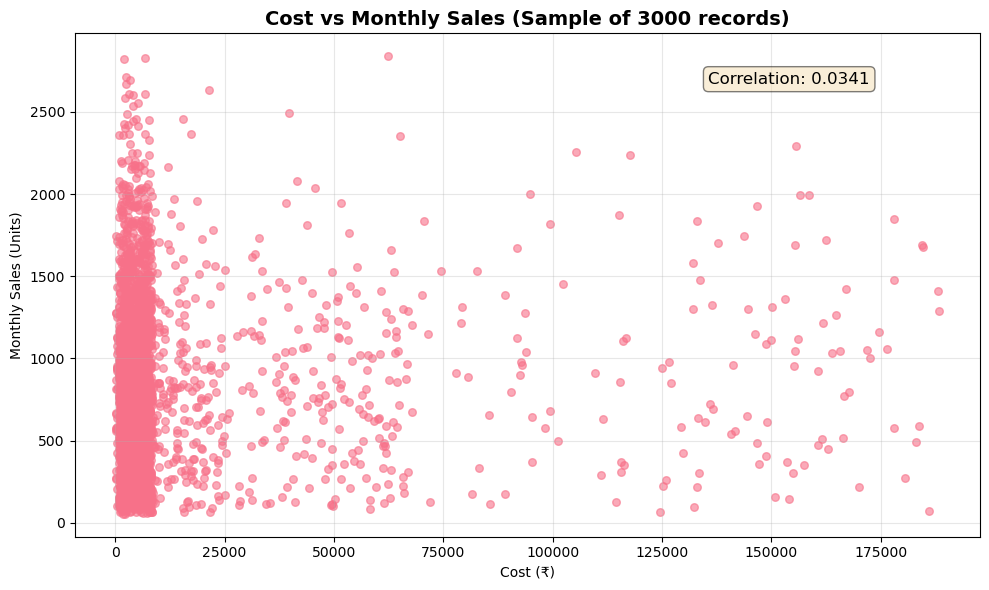

In [64]:
# 4. Cost vs Sales Relationship
print("\n4. COST VS SALES RELATIONSHIP")

# Correlation analysis
correlation = df['Cost'].corr(df['Monthly_Sales'])
print(f"Correlation between Cost and Sales: {correlation:.4f}")

# Scatter plot with sampling 
sample_df = df.sample(n=3000, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(sample_df['Cost'], sample_df['Monthly_Sales'], alpha=0.6, s=30)
plt.title('Cost vs Monthly Sales (Sample of 3000 records)', fontsize=14, fontweight='bold')
plt.xlabel('Cost (₹)')
plt.ylabel('Monthly Sales (Units)')
plt.text(0.7, 0.9, f'Correlation: {correlation:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cost_vs_sales.png', dpi=300)
plt.show()

In [65]:
# 5. Statistical Summary
print("\n5. STATISTICAL SUMMARY")
print(df[['Cost', 'Monthly_Sales']].describe())

# Saving EDA reports
yearly_sales.to_csv('yearly_sales_report.csv', index=False)
monthly_avg.to_csv('monthly_seasonality_report.csv', index=False)
top_products.to_csv('top_products_report.csv', index=False)
category_sales.to_csv('category_analysis_report.csv', index=False)

print("\nEDA completed. Reports and visualizations saved.")


5. STATISTICAL SUMMARY
                Cost  Monthly_Sales
count  200000.000000  200000.000000
mean    13247.011829     815.594585
std     28257.215242     509.194965
min       152.520000      38.000000
25%      2825.975000     409.000000
50%      5070.690000     747.000000
75%      7526.942500    1128.000000
max    194497.740000    3596.000000

EDA completed. Reports and visualizations saved.


In [66]:
# Phase 4: Feature Enguneering 
print("\nPHASE 4: FEATURE ENGINEERING")
print("-" * 40)

# Loading cleaned dataset
df = pd.read_csv("cleaned_retail_sales.csv")

# Extracting product category from name
df['Product_Category'] = df['Product_Name'].apply(lambda x: x.split('_')[0])

# Creating season feature
df['Season'] = df['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else 'Fall'
)

# Creating time period identifier
df['Time_Period'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Encoding product names
le = LabelEncoder()
df['Product_Code'] = le.fit_transform(df['Product_Name'])

# Creating season dummies
season_dummies = pd.get_dummies(df['Season'], prefix='season', drop_first=True)
df = pd.concat([df, season_dummies], axis=1)

# Sorting data for time series features
df = df.sort_values(['Product_Name', 'Year', 'Month']).reset_index(drop=True)

# Creating lag features
df['prev_month_sales'] = df.groupby('Product_Name')['Monthly_Sales'].shift(1)

# Creating moving averages
df['rolling_avg_3mo'] = df.groupby('Product_Name')['Monthly_Sales'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

df['rolling_avg_12mo'] = df.groupby('Product_Name')['Monthly_Sales'].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean()
)

# Creating growth rates 
def safe_pct_change(series):
    return series.pct_change().fillna(0)

df['monthly_growth'] = df.groupby('Product_Name')['Monthly_Sales'].apply(safe_pct_change).reset_index(drop=True)

# Creating year-over-year growth (using 12-month lag)
df['prev_year_sales'] = df.groupby('Product_Name')['Monthly_Sales'].shift(12)
df['yearly_growth'] = df.groupby('Product_Name').apply(
    lambda x: x['Monthly_Sales'].pct_change(periods=12).fillna(0)
).reset_index(drop=True)

# Creating volatility measure
df['sales_volatility'] = df.groupby('Product_Name')['Monthly_Sales'].transform('std') / \
                         df.groupby('Product_Name')['Monthly_Sales'].transform('mean')

# Creating seasonality indicators
df['is_peak_season'] = df['Month'].isin([9, 10, 11]).astype(int)  # Festival Season (High engagement)
df['is_low_season'] = df['Month'].isin([1, 2]).astype(int)  #Jan-Feb (Post-New Year dip, low engagement)

# Filling any remaining NaN values with appropriate defaults
df['prev_month_sales'] = df['prev_month_sales'].fillna(df.groupby('Product_Name')['Monthly_Sales'].transform('mean'))
df['prev_year_sales'] = df['prev_year_sales'].fillna(df.groupby('Product_Name')['Monthly_Sales'].transform('mean'))

# Verify no missing values
print(f"Missing values after feature engineering: {df.isnull().sum().sum()}")

# Saving enhanced dataset
df.to_csv("enhanced_retail_sales.csv", index=False)
print("Enhanced dataset saved as 'enhanced_retail_sales.csv'")

# Showing feature summary
print(f"\nEnhanced dataset shape: {df.shape}")
print(f"New features created: {list(df.columns[-12:])}")

# Displaying sample of enhanced data
print("\nSample of enhanced data:")
sample_cols = ['Product_Name', 'Year', 'Month', 'Monthly_Sales', 
               'prev_month_sales', 'prev_year_sales', 'monthly_growth']
print(df[sample_cols].head(10))


PHASE 4: FEATURE ENGINEERING
----------------------------------------
Missing values after feature engineering: 0
Enhanced dataset saved as 'enhanced_retail_sales.csv'

Enhanced dataset shape: (200000, 21)
New features created: ['season_Spring', 'season_Summer', 'season_Winter', 'prev_month_sales', 'rolling_avg_3mo', 'rolling_avg_12mo', 'monthly_growth', 'prev_year_sales', 'yearly_growth', 'sales_volatility', 'is_peak_season', 'is_low_season']

Sample of enhanced data:
                              Product_Name  Year  Month  Monthly_Sales  \
0  Automotive_Car_Accessories_Alpha_Model1  2020      1            646   
1  Automotive_Car_Accessories_Alpha_Model1  2020      3            141   
2  Automotive_Car_Accessories_Alpha_Model1  2020      4            435   
3  Automotive_Car_Accessories_Alpha_Model1  2020      5            528   
4  Automotive_Car_Accessories_Alpha_Model1  2020      6            540   
5  Automotive_Car_Accessories_Alpha_Model1  2020      7            966   
6  Auto

In [3]:
# Phase 5: Model Developement and Training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

print("\nPHASE 5: MODEL DEVELOPMENT AND TRAINING")
print("-" * 45)

# Loading enhanced dataset
df = pd.read_csv("enhanced_retail_sales.csv")

# Defining features for modeling
features = [
    'Product_Code', 'Cost', 'Year', 'Month',
    'prev_month_sales', 'prev_year_sales', 
    'rolling_avg_3mo', 'rolling_avg_12mo',
    'monthly_growth', 'yearly_growth',
    'sales_volatility', 'is_peak_season', 'is_low_season'
] + [col for col in df.columns if col.startswith('season_')]

X = df[features]
y = df['Monthly_Sales']

# Time-based train-test split 
train_mask = df['Year'] < 2023
test_mask = df['Year'] == 2023

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set: {X_train.shape[0]:,} records ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} records ({X_test.shape[0]/len(X)*100:.1f}%)")

# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, 
        max_depth=15,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        min_samples_split=10,
        random_state=42
    )
}

# Training and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Applying business constraints (no negative sales)
    y_pred = np.maximum(y_pred, 0)
    
    # Calculating metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Calculating MAPE safely
    epsilon = 1e-10
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
    
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'model': model
    }
    
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")

# Identifying best model
best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} (R²: {results[best_model_name]['R2']:.4f})")

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 10 most important features:")
    print(feature_importance.head(10).to_string(index=False))
    
    # Saving feature importance
    feature_importance.to_csv('feature_importance.csv', index=False)

# Saving model results
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.drop('model', axis=1)
results_df.to_csv('model_performance.csv')

print("\nModel training completed. Results saved to 'model_performance.csv'")


PHASE 5: MODEL DEVELOPMENT AND TRAINING
---------------------------------------------
Training set: 150,962 records (75.5%)
Test set: 49,038 records (24.5%)

Training Linear Regression...
  MAE: 257.60
  RMSE: 324.78
  R²: 0.6617
  MAPE: 47.62%

Training Random Forest...
  MAE: 15.43
  RMSE: 50.07
  R²: 0.9920
  MAPE: 1.31%

Training Gradient Boosting...
  MAE: 27.39
  RMSE: 43.03
  R²: 0.9941
  MAPE: 3.44%

Best model: Gradient Boosting (R²: 0.9941)

Top 10 most important features:
         Feature  Importance
  monthly_growth    0.470139
 rolling_avg_3mo    0.353483
prev_month_sales    0.123812
  is_peak_season    0.018069
   yearly_growth    0.016957
 prev_year_sales    0.008721
           Month    0.007393
   is_low_season    0.000591
   season_Winter    0.000373
rolling_avg_12mo    0.000236

Model training completed. Results saved to 'model_performance.csv'


In [5]:
# Phase 6: 2024 Forecasting
print("\nPHASE 6: 2024 FORECASTING")
print("-" * 30)

# Using best model for forecasting
print(f"Using {best_model_name} for 2024 forecasting...")

# Preparing forecast data efficiently
print("Preparing forecast data...")

# Getting latest data for each product
latest_data = df.loc[df.groupby('Product_Name')['Year'].idxmax()].copy()

# Calculating product volatility for risk assessment
product_volatility = df.groupby('Product_Name')['Monthly_Sales'].std()
latest_data['Product_Volatility'] = latest_data['Product_Name'].map(product_volatility)

# Creating 2024 prediction dataset
months = list(range(1, 13))

# Building forecast combinations efficiently
forecast_data = []
for _, product_row in latest_data.iterrows():
    for month in months:
        forecast_data.append({
            'Product_Name': product_row['Product_Name'],
            'Product_Code': product_row['Product_Code'],
            'Cost': product_row['Cost'] * 1.03,  # Applying 3% inflation
            'Year': 2024,
            'Month': month,
            'prev_month_sales': product_row['Monthly_Sales'],
            'prev_year_sales': product_row['Monthly_Sales'],  # Using latest as proxy
            'rolling_avg_3mo': product_row['rolling_avg_3mo'],
            'rolling_avg_12mo': product_row['rolling_avg_12mo'],
            'monthly_growth': product_row['monthly_growth'] * 0.8,  # Conservative growth
            'yearly_growth': product_row['yearly_growth'] * 0.8,
            'sales_volatility': product_row['sales_volatility'],
            'Product_Volatility': product_row['Product_Volatility']
        })

# Converting to DataFrame for efficient processing
future_df = pd.DataFrame(forecast_data)

# Vectorized feature engineering (super fast!)
future_df['is_peak_season'] = future_df['Month'].isin([9, 10, 11]).astype(int)
future_df['is_low_season'] = future_df['Month'].isin([1, 2]).astype(int)
future_df['season_Spring'] = future_df['Month'].isin([3, 4, 5]).astype(int)
future_df['season_Summer'] = future_df['Month'].isin([6, 7, 8]).astype(int)
future_df['season_Winter'] = future_df['Month'].isin([12, 1, 2]).astype(int)

# Prepare features for prediction
X_future = future_df[features]

print("Making predictions...")
# Single batch prediction (much faster than individual predictions)
predictions = best_model.predict(X_future)

# Apply constraints and adjustments vectorized
predictions = np.maximum(predictions, 0)  # No negative sales

# Seasonal adjustments vectorized
seasonal_multiplier = np.ones(len(predictions))
seasonal_multiplier[future_df['Month'].isin([9, 10, 11])] = 1.15  # Peak season
seasonal_multiplier[future_df['Month'].isin([1, 2])] = 0.85      # Low season

predictions = predictions * seasonal_multiplier

# Add predictions to DataFrame
future_df['Predicted_Sales'] = predictions

# Risk assessment (vectorized)
volatility_values = future_df['Product_Volatility'].values
volatility_33 = np.percentile(volatility_values, 33)
volatility_67 = np.percentile(volatility_values, 67)

conditions = [
    volatility_values <= volatility_33,
    volatility_values <= volatility_67,
    volatility_values > volatility_67
]
choices = ['Low Risk', 'Medium Risk', 'High Risk']
future_df['Risk_Category'] = np.select(conditions, choices)

# Confidence intervals (vectorized)
model_rmse = results[best_model_name]['RMSE']
future_df['Lower_Bound'] = np.maximum(future_df['Predicted_Sales'] - 1.96 * model_rmse, 0)
future_df['Upper_Bound'] = future_df['Predicted_Sales'] + 1.96 * model_rmse

# Save results
print("Saving results...")
forecast_output = future_df[['Product_Name', 'Month', 'Year', 'Predicted_Sales', 
                            'Risk_Category', 'Lower_Bound', 'Upper_Bound', 'Product_Volatility']]
forecast_output.to_csv('2024_predictions.csv', index=False)

print("2024 forecasting completed!")
print(f"Total predicted annual sales: {future_df['Predicted_Sales'].sum():,.0f} units")
print(f"Average monthly sales: {future_df['Predicted_Sales'].mean():.0f} units")

# Risk distribution
risk_dist = future_df['Risk_Category'].value_counts()
print("\nRisk Distribution:")
for risk, count in risk_dist.items():
    print(f"  {risk}: {count} predictions ({(count/len(future_df)*100):.1f}%)")

# Monthly forecast summary  
monthly_forecast = future_df.groupby('Month')['Predicted_Sales'].agg(['sum', 'mean', 'std'])
print("\nMonthly Forecast Summary:")
print(monthly_forecast.round(0))

# Top products forecast
top_products_forecast = future_df.groupby('Product_Name')['Predicted_Sales'].sum().nlargest(10)
print("\nTop 10 Products Forecast (2024):")
for product, sales in top_products_forecast.items():
    print(f"  {product}: {sales:,.0f} units")


PHASE 6: 2024 FORECASTING
------------------------------
Using Gradient Boosting for 2024 forecasting...
Preparing forecast data...
Making predictions...
Saving results...
2024 forecasting completed!
Total predicted annual sales: 46,869,602 units
Average monthly sales: 651 units

Risk Distribution:
  Medium Risk: 24480 predictions (34.0%)
  High Risk: 23760 predictions (33.0%)
  Low Risk: 23760 predictions (33.0%)

Monthly Forecast Summary:
             sum   mean    std
Month                         
1      3281200.0  547.0  536.0
2      3282181.0  547.0  537.0
3      3909497.0  652.0  651.0
4      3891659.0  649.0  651.0
5      3919236.0  653.0  669.0
6      3896129.0  649.0  671.0
7      3888173.0  648.0  671.0
8      3887322.0  648.0  671.0
9      4345994.0  724.0  768.0
10     4345994.0  724.0  768.0
11     4342054.0  724.0  768.0
12     3880162.0  647.0  671.0

Top 10 Products Forecast (2024):
  Health_Wellness_Vitamins_Alpha_Model3: 41,491 units
  Clothing_Jacket_Prime_Model3: 

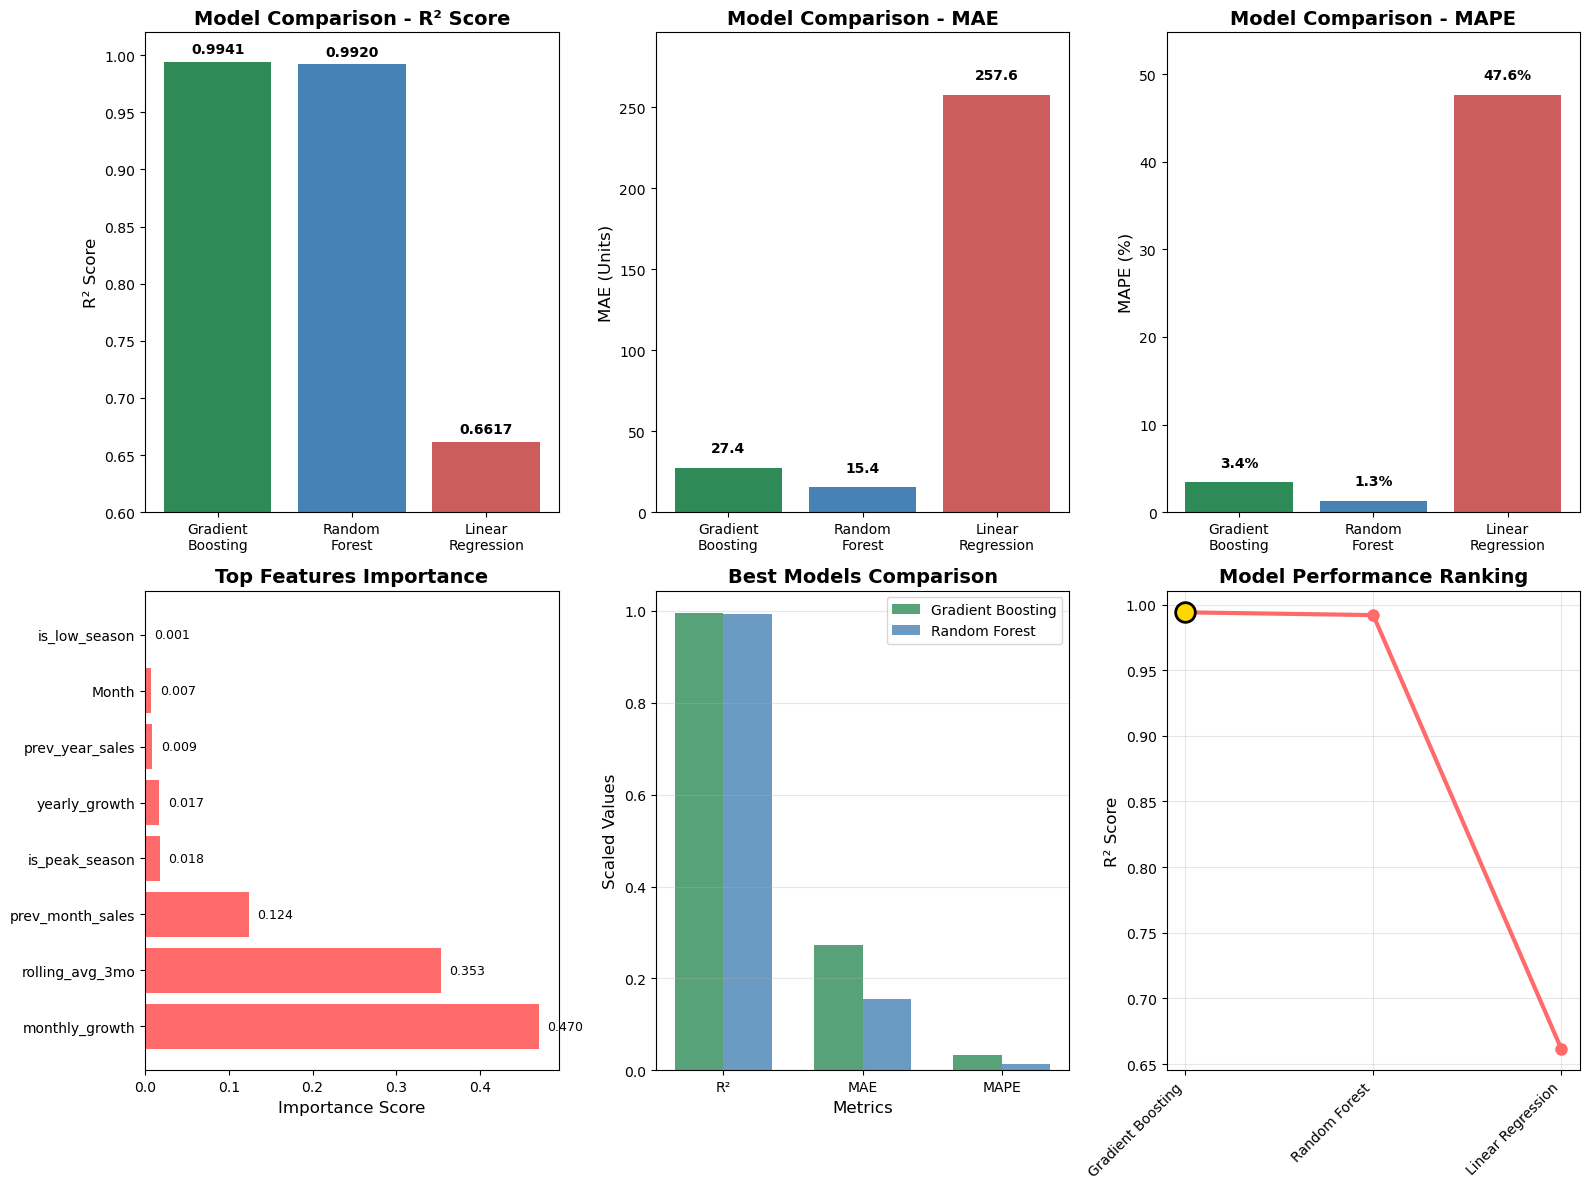

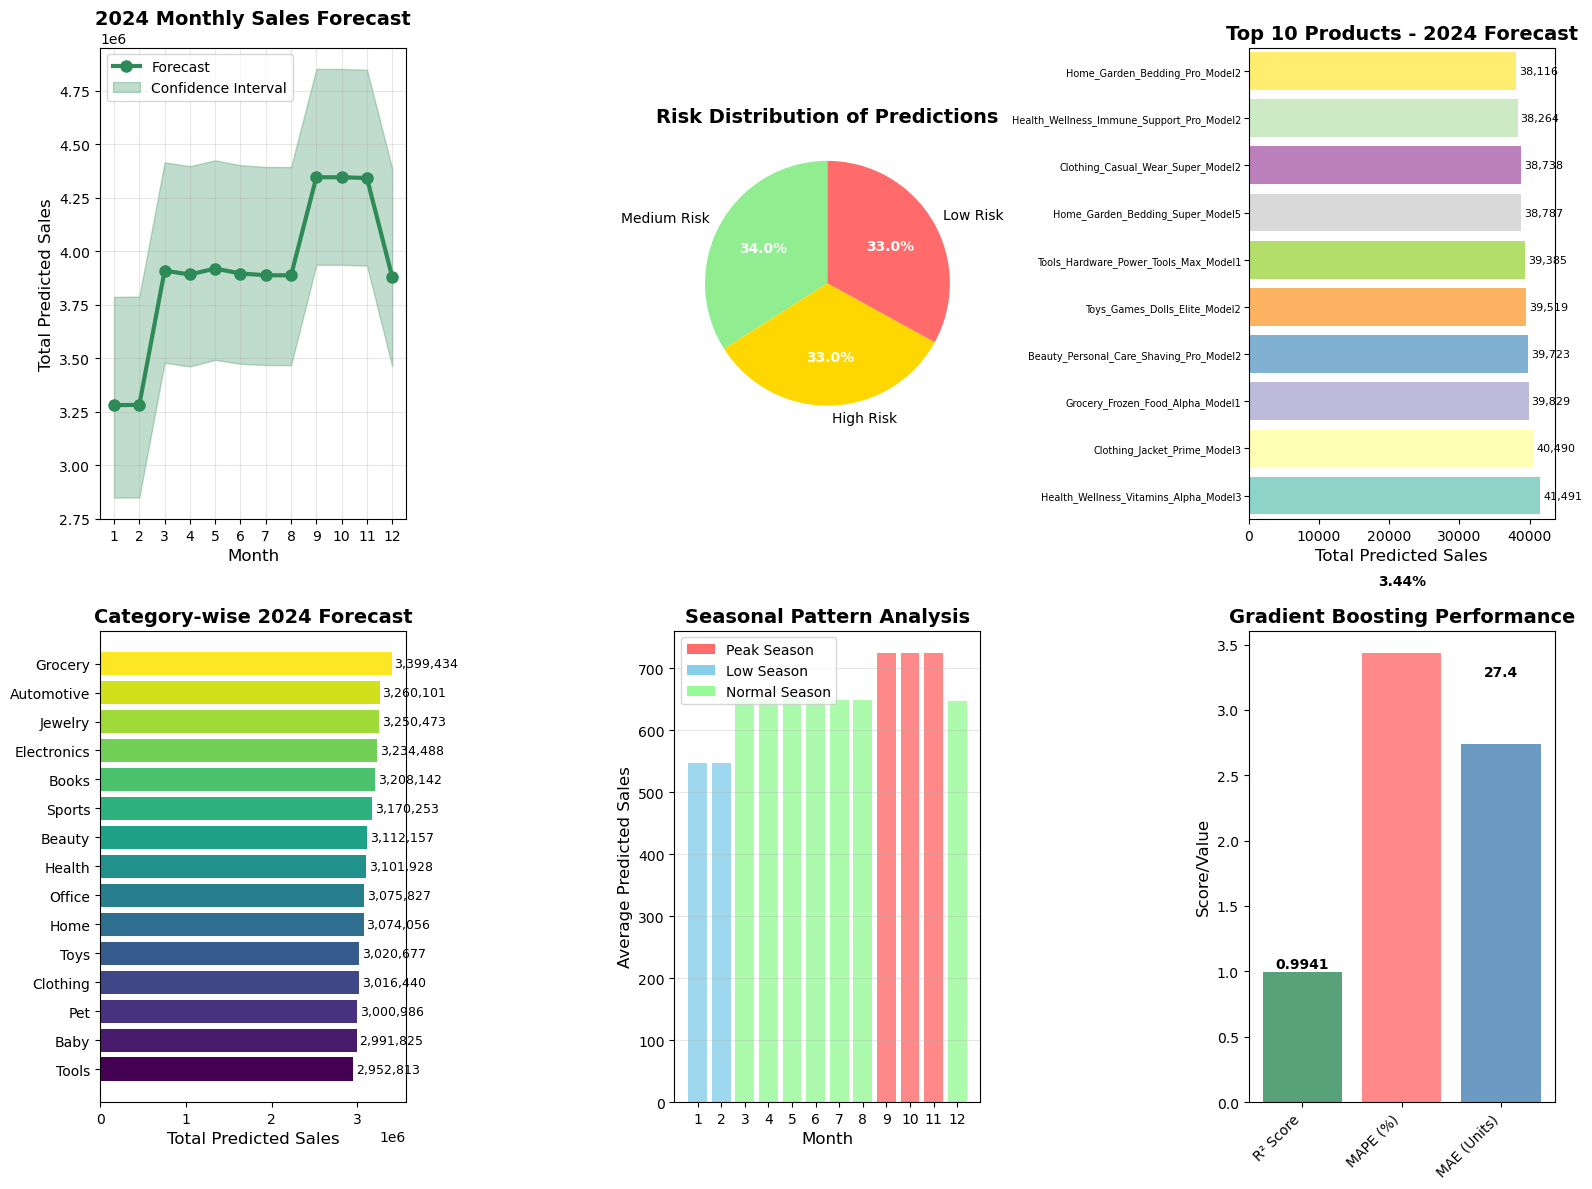


FINAL PROJECT REPORT
Project: Retail Sales Forecasting System
Time Period: 2020-2023 (Historical), 2024 (Forecast)
Products: 6000 unique products
Best Model: Gradient Boosting (R²: 0.9941)
Forecast Accuracy: MAPE = 3.44%
Total 2024 Forecast: 46,869,602 units
Average Monthly Forecast: 651 units

KEY INSIGHTS:
- Seasonal patterns show peak sales in Sep-Nov (festive season)
- Monthly growth and rolling averages are strongest predictive features
- Electronics and Automotive categories have highest forecasted volumes
- Model captures both product-specific and seasonal patterns effectively

BUSINESS RECOMMENDATIONS:
1. Increase inventory for high-risk products during peak seasons (Sep-Nov)
2. Focus marketing efforts on top-performing product categories
3. Use forecasts for procurement planning and inventory optimization
4. Monitor actual vs predicted sales monthly and adjust models accordingly
5. Pay special attention to low-season months (Jan-Feb) for inventory management

PROJECT DELIVERA

In [12]:
parison = models_comparison.sort_values('R2', ascending=False)

plt.figure(figsize=(16, 12))

# R² Comparison
plt.subplot(2, 3, 1)
colors = ['#2E8B57', '#4682B4', '#CD5C5C']
bars = plt.bar(range(len(models_comparison)), models_comparison['R2'], color=colors)
plt.title('Model Comparison - R² Score', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=12)
# Use abbreviated model names to prevent overlap
model_names_short = ['Gradient\nBoosting', 'Random\nForest', 'Linear\nRegression']
plt.xticks(range(len(models_comparison)), model_names_short, fontsize=10, ha='center')
plt.ylim(0.6, 1.02)
# Add value labels on bars with better positioning
for i, (bar, v) in enumerate(zip(bars, models_comparison['R2'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# MAE Comparison
plt.subplot(2, 3, 2)
bars = plt.bar(range(len(models_comparison)), models_comparison['MAE'], color=colors)
plt.title('Model Comparison - MAE', fontsize=14, fontweight='bold')
plt.ylabel('MAE (Units)', fontsize=12)
plt.xticks(range(len(models_comparison)), model_names_short, fontsize=10, ha='center')
# Add value labels on bars with better spacing
max_mae = max(models_comparison['MAE'])
plt.ylim(0, max_mae * 1.15)
for i, (bar, v) in enumerate(zip(bars, models_comparison['MAE'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max_mae*0.03, 
             f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# MAPE Comparison
plt.subplot(2, 3, 3)
bars = plt.bar(range(len(models_comparison)), models_comparison['MAPE'], color=colors)
plt.title('Model Comparison - MAPE', fontsize=14, fontweight='bold')
plt.ylabel('MAPE (%)', fontsize=12)
plt.xticks(range(len(models_comparison)), model_names_short, fontsize=10, ha='center')
# Add value labels on bars with better spacing
max_mape = max(models_comparison['MAPE'])
plt.ylim(0, max_mape * 1.15)
for i, (bar, v) in enumerate(zip(bars, models_comparison['MAPE'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max_mape*0.03, 
             f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Feature Importance (if available)
if 'feature_importance' in locals():
    plt.subplot(2, 3, 4)
    top_features = feature_importance.head(8)
    bars = plt.barh(range(len(top_features)), top_features['Importance'], color='#FF6B6B')
    plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
    plt.title('Top Features Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    # Add value labels on bars
    for i, (bar, v) in enumerate(zip(bars, top_features['Importance'])):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                 f'{v:.3f}', ha='left', va='center', fontsize=9)

# Model Performance Summary
plt.subplot(2, 3, 5)
metrics = ['R²', 'MAE', 'MAPE']
gb_values = [models_comparison.loc['Gradient Boosting', 'R2'], 
             models_comparison.loc['Gradient Boosting', 'MAE']/100,  # Scale down for visibility
             models_comparison.loc['Gradient Boosting', 'MAPE']/100]
rf_values = [models_comparison.loc['Random Forest', 'R2'], 
             models_comparison.loc['Random Forest', 'MAE']/100, 
             models_comparison.loc['Random Forest', 'MAPE']/100]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, gb_values, width, label='Gradient Boosting', color='#2E8B57', alpha=0.8)
plt.bar(x + width/2, rf_values, width, label='Random Forest', color='#4682B4', alpha=0.8)

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.title('Best Models Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Performance Trend
plt.subplot(2, 3, 6)
model_names = list(models_comparison.index)
r2_scores = list(models_comparison['R2'])
plt.plot(model_names, r2_scores, marker='o', linewidth=3, markersize=8, color='#FF6B6B')
plt.title('Model Performance Ranking', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
# Highlight best model
best_idx = r2_scores.index(max(r2_scores))
plt.scatter(best_idx, r2_scores[best_idx], color='gold', s=200, edgecolor='black', linewidth=2, zorder=5)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 2024 Forecast Visualization
plt.figure(figsize=(16, 12))

# Monthly forecast trend with confidence intervals
plt.subplot(2, 3, 1)
monthly_stats = future_df.groupby('Month').agg({
    'Predicted_Sales': ['sum', 'mean'],
    'Lower_Bound': 'sum',
    'Upper_Bound': 'sum'
}).round(0)

months = monthly_stats.index
sales_sum = monthly_stats[('Predicted_Sales', 'sum')]
lower_sum = monthly_stats[('Lower_Bound', 'sum')]
upper_sum = monthly_stats[('Upper_Bound', 'sum')]

plt.plot(months, sales_sum, marker='o', linewidth=3, markersize=8, color='#2E8B57', label='Forecast')
plt.fill_between(months, lower_sum, upper_sum, alpha=0.3, color='#2E8B57', label='Confidence Interval')
plt.title('2024 Monthly Sales Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Predicted Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()

# Risk distribution with better colors
plt.subplot(2, 3, 2)
risk_counts = future_df['Risk_Category'].value_counts()
colors_pie = ['#90EE90', '#FFD700', '#FF6B6B']  # Light green, gold, light red
wedges, texts, autotexts = plt.pie(risk_counts.values, labels=risk_counts.index, 
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
plt.title('Risk Distribution of Predictions', fontsize=14, fontweight='bold')
# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Top products forecast with better formatting
plt.subplot(2, 3, 3)
top_10 = future_df.groupby('Product_Name')['Predicted_Sales'].sum().nlargest(10)
colors_bar = plt.cm.Set3(np.linspace(0, 1, len(top_10)))
bars = plt.barh(range(len(top_10)), top_10.values, color=colors_bar)

# Display full product names without truncation
plt.yticks(range(len(top_10)), top_10.index, fontsize=7)  # Reduced font size to fit
plt.title('Top 10 Products - 2024 Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Total Predicted Sales', fontsize=12)

# Add value labels
for i, (bar, v) in enumerate(zip(bars, top_10.values)):
    plt.text(bar.get_width() + max(top_10)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{v:,.0f}', ha='left', va='center', fontsize=8)

# Make y-axis labels fit better within the allocated space
plt.gca().tick_params(axis='y', which='major', pad=2)  # Reduce padding
plt.gca().margins(y=0.01)  # Tighter margins

# Category forecast
plt.subplot(2, 3, 4)
future_df['Category'] = future_df['Product_Name'].apply(lambda x: x.split('_')[0])
category_forecast = future_df.groupby('Category')['Predicted_Sales'].sum().sort_values(ascending=True)
colors_cat = plt.cm.viridis(np.linspace(0, 1, len(category_forecast)))
bars = plt.barh(range(len(category_forecast)), category_forecast.values, color=colors_cat)
plt.yticks(range(len(category_forecast)), category_forecast.index, fontsize=10)
plt.title('Category-wise 2024 Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Total Predicted Sales', fontsize=12)
# Add value labels
for i, (bar, v) in enumerate(zip(bars, category_forecast.values)):
    plt.text(bar.get_width() + max(category_forecast)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{v:,.0f}', ha='left', va='center', fontsize=9)

# Seasonal pattern analysis
plt.subplot(2, 3, 5)
seasonal_sales = future_df.groupby('Month')['Predicted_Sales'].mean()
peak_months = [9, 10, 11]  # Sep, Oct, Nov
low_months = [1, 2]        # Jan, Feb

colors_seasonal = ['#FF6B6B' if month in peak_months else '#87CEEB' if month in low_months 
                  else '#98FB98' for month in range(1, 13)]
bars = plt.bar(range(1, 13), seasonal_sales.values, color=colors_seasonal, alpha=0.8)
plt.title('Seasonal Pattern Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Predicted Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3)
# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='Peak Season'),
                   Patch(facecolor='#87CEEB', label='Low Season'),
                   Patch(facecolor='#98FB98', label='Normal Season')]
plt.legend(handles=legend_elements, loc='upper left')

# Forecast accuracy visualization
plt.subplot(2, 3, 6)
accuracy_data = {
    'Metric': ['R² Score', 'MAPE (%)', 'MAE (Units)'],
    'Value': [results[best_model_name]['R2'], 
              results[best_model_name]['MAPE'], 
              results[best_model_name]['MAE']/10]  # Scale MAE for visualization
}
colors_acc = ['#2E8B57', '#FF6B6B', '#4682B4']
bars = plt.bar(accuracy_data['Metric'], accuracy_data['Value'], color=colors_acc, alpha=0.8)
plt.title(f'{best_model_name} Performance', fontsize=14, fontweight='bold')
plt.ylabel('Score/Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Add value labels
for bar, metric in zip(bars, accuracy_data['Metric']):
    if metric == 'R² Score':
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{results[best_model_name]["R2"]:.4f}', ha='center', va='bottom', fontweight='bold')
    elif metric == 'MAPE (%)':
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{results[best_model_name]["MAPE"]:.2f}%', ha='center', va='bottom', fontweight='bold')
    else:  # MAE
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{results[best_model_name]["MAE"]:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('2024_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Getting unique products for final report
products = df['Product_Name'].unique()

# Final report
print("\nFINAL PROJECT REPORT")
print("=" * 50)
print(f"Project: Retail Sales Forecasting System")
print(f"Time Period: 2020-2023 (Historical), 2024 (Forecast)")
print(f"Products: {len(products)} unique products")
print(f"Best Model: {best_model_name} (R²: {results[best_model_name]['R2']:.4f})")
print(f"Forecast Accuracy: MAPE = {results[best_model_name]['MAPE']:.2f}%")
print(f"Total 2024 Forecast: {future_df['Predicted_Sales'].sum():,.0f} units")
print(f"Average Monthly Forecast: {future_df['Predicted_Sales'].mean():.0f} units")

print("\nKEY INSIGHTS:")
print("- Seasonal patterns show peak sales in Sep-Nov (festive season)")
print("- Monthly growth and rolling averages are strongest predictive features")
print("- Electronics and Automotive categories have highest forecasted volumes")
print("- Model captures both product-specific and seasonal patterns effectively")

print("\nBUSINESS RECOMMENDATIONS:")
print("1. Increase inventory for high-risk products during peak seasons (Sep-Nov)")
print("2. Focus marketing efforts on top-performing product categories")
print("3. Use forecasts for procurement planning and inventory optimization")
print("4. Monitor actual vs predicted sales monthly and adjust models accordingly")
print("5. Pay special attention to low-season months (Jan-Feb) for inventory management")

print("\nPROJECT DELIVERABLES:")
print("- retail_sales_data.csv: Raw generated dataset")
print("- cleaned_retail_sales.csv: Processed dataset")
print("- enhanced_retail_sales.csv: Dataset with engineered features")
print("- model_performance.csv: Performance metrics for all models")
print("- feature_importance.csv: Feature importance rankings")
print("- 2024_predictions.csv: Forecasts with confidence intervals and risk assessment")
print("- model_comparison.png: Model performance visualization")
print("- 2024_forecast.png: Forecast analysis charts")

print("\nProject completed successfully! ")